# Hw3
## Alejandro Moscoso 332336908
## Shiraz benyatov 313592958

In [1]:
# Import the libraries use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
from sklearn import decomposition


1. Load the connectionist bench data set from
https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

we download the Data from the web-page and save it as **'sonar.all-data'**


In [2]:
sonar= pd.read_csv('sonar.all-data',header=None)

#divide the data into data and Labels
sonar_names = sonar.iloc[:,-1] 
sonar_data = sonar.iloc[:,0:-1]
#normalize the data to the standar N(0,1)
Sonar_data_normal=(sonar_data - sonar_data.mean())/ sonar_data.std()
sonar_data=Sonar_data_normal

IOError: File sonar.all-data does not exist

2.- Give a short explanation on the data set, you may include some visualiza-tion of it (similar to the tutorial).
*  Patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.
* Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time.

3.-  Compute its PCA representation.
4.- Visualize the data on 2d and 3d scatter plots.
* for the question 3 and for we will build a 3 axis representation of the data set and plot it as a **2D and 3D scatter plot**


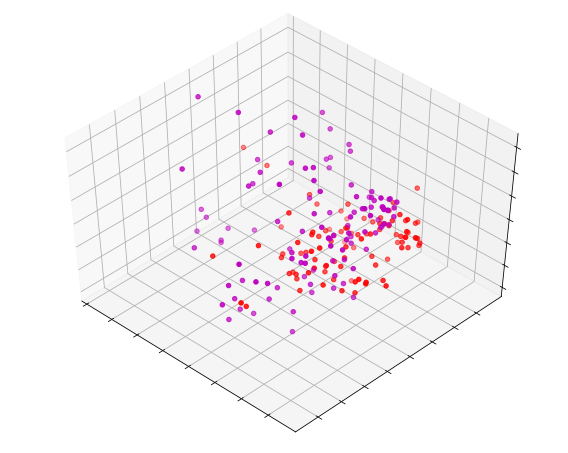

In [260]:
# Q3 and Q4
pca = decomposition.PCA(n_components=3) # creating a PCA object
pca.fit(sonar_data)
sonar_pc0_pc1_pc2 = pca.transform(sonar_data)
X3=sonar_pc0_pc1_pc2
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# for name, label in [('Mine', 0), ('Rock', 1)]:
#     ax.text3D(X3[y == label, 0].mean(),
#               X3[y == label, 1].mean() ,
              
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
# y_number = np.choose(sonar_names, [0,1]) #.astype(np.float)
ax.scatter(X3[:,0], X3[:, 1], X3[:, 2], c=sonar_names, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [3]:
# 2d plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(17,5))

ax1.scatter(X3[:,0], X3[:,1], c=sonar_names)
ax1.set_title('Pc0 vs Pc1')
ax2.scatter(X3[:,0], X3[:,2], c=sonar_names)

ax2.set_title('Pc0 vs Pc2')
ax3.scatter(X3[:,1], X3[:,2], c=sonar_names)

ax3.set_title('Pc1 vs Pc2')
plt.show()

NameError: name 'X3' is not defined

5.- Present the error curve.
* In the next two cells we will compute the eigenvalues distribution and the error distribuition 

6.- How many Eigen vectors can you take to obtain:

* (a) 95% error
* * Taking: 2 eigenvector the reconstruction Error is: 0.9626133650818979



* (b) 99% error
* * Taking: 1 eigenvector the reconstruction Error is: 0.9806970522765558

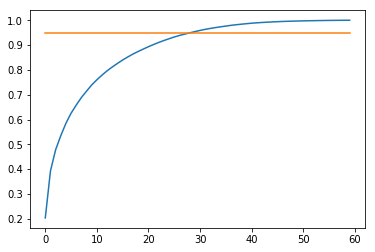

If we sum the total sum varians we can see that after 29 eig vectors we have more than 95% of the variance


In [262]:
# Find the eigenvalues and eigenvectors of the covariance matrix
eig_vals, eig_vect = np.linalg.eig(sonar_data.cov())

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vect[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) #Calculate cummulative value

plt.plot(cum_var_exp) 
plt.plot([0.95 for i in range(len(cum_var_exp))])
plt.show()

confi95 =np.where(cum_var_exp>0.95)[0][0]

print( f'If we sum the total sum varians we can see that after {confi95} eig vectors we have more than 95% of the variance')


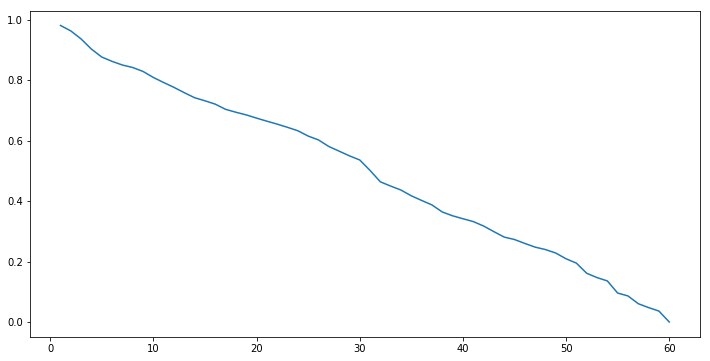

Taking: 1 eigenvector the reconstruction Error is: 0.9806970522765558
Taking: 2 eigenvector the reconstruction Error is: 0.9626133650818979
Taking: 3 eigenvector the reconstruction Error is: 0.9359202045967457
Taking: 60 eigenvector the reconstruction Error is: 2.450497257221034e-29
Taking: 59 eigenvector the reconstruction Error is: 0.03604079370206865
Taking: 58 eigenvector the reconstruction Error is: 0.047580236849162655


In [278]:

eig_vect_order=pd.DataFrame([eig_pairs[i][1] for i in range(len(eig_pairs))])
results= dict ( 
    number_eig = [],
    error =[],
)
#find the error for all the posibilities of eigenvetors
for i in range(60,0,-1):
    W = eig_vect_order.iloc[:,0:i]
    diff = ((np.linalg.pinv(W)).T).dot((W.T).dot(sonar_data.T))-sonar_data.T   
    error = np.square(np.linalg.norm(diff, ord ='fro')/(np.linalg.norm(sonar_data,ord ='fro')))
    results['number_eig'].append(i)
    results['error'].append(error)
    
plt.figure(figsize=[12,6])
plt.plot(results['number_eig'],results['error'])
plt.show()

for i in range(59,56,-1):
    print( f'Taking: {results["number_eig"][i]} eigenvector the reconstruction Error is: {results["error"][i]}')
for i in range(3):
    print( f'Taking: {results["number_eig"][i]} eigenvector the reconstruction Error is: {results["error"][i]}')
    
